# Preambles, import

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
from Fluxonium_hamiltonians import qchard_coupobj as coupobj
from Fluxonium_hamiltonians import qchard_transmon as transmon
from Fluxonium_hamiltonians import qchard_resonator as resonator
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400

# Parameters, sweep coupling

In [120]:
omega1 = 5.0 #GHz
omega2 = 5.1
omega3 = 5.46
omega4 = 5.63
alpha1 = -0.273
alpha2 = -0.273
alpha3 = -0.270
alpha4 = -0.267
nlev = 5
qubit1 = transmon.TransmonSimple(omega_q = omega1, alpha = alpha1, nlev = nlev)
qubit2 = transmon.TransmonSimple(omega_q = omega2, alpha = alpha2, nlev = nlev)
qubit3 = transmon.TransmonSimple(omega_q = omega3, alpha = alpha3, nlev = nlev)
qubit4 = transmon.TransmonSimple(omega_q = omega4, alpha = alpha4, nlev = nlev)

## Direct coupling

In [121]:
#Sweep coupling
J_C_array = np.linspace(0,0.005,101) #GHz
m_element = np.zeros_like(J_C_array)
energies_coupled_swE = np.zeros((qubit1.nlev * qubit2.nlev, len(J_C_array)))
for idx, J_C in enumerate(J_C_array):
    system = coupobj.CoupledObjects(qubit1, qubit2,
                                    [qubit1, qubit2, J_C, 'JC-rwa'])
    energies_coupled_swE[:,idx] = system.levels()
    m_element[idx] = abs(system.a(0).matrix_element(system.eigvec('00'), system.eigvec('01')))

(0.0, 5.0)

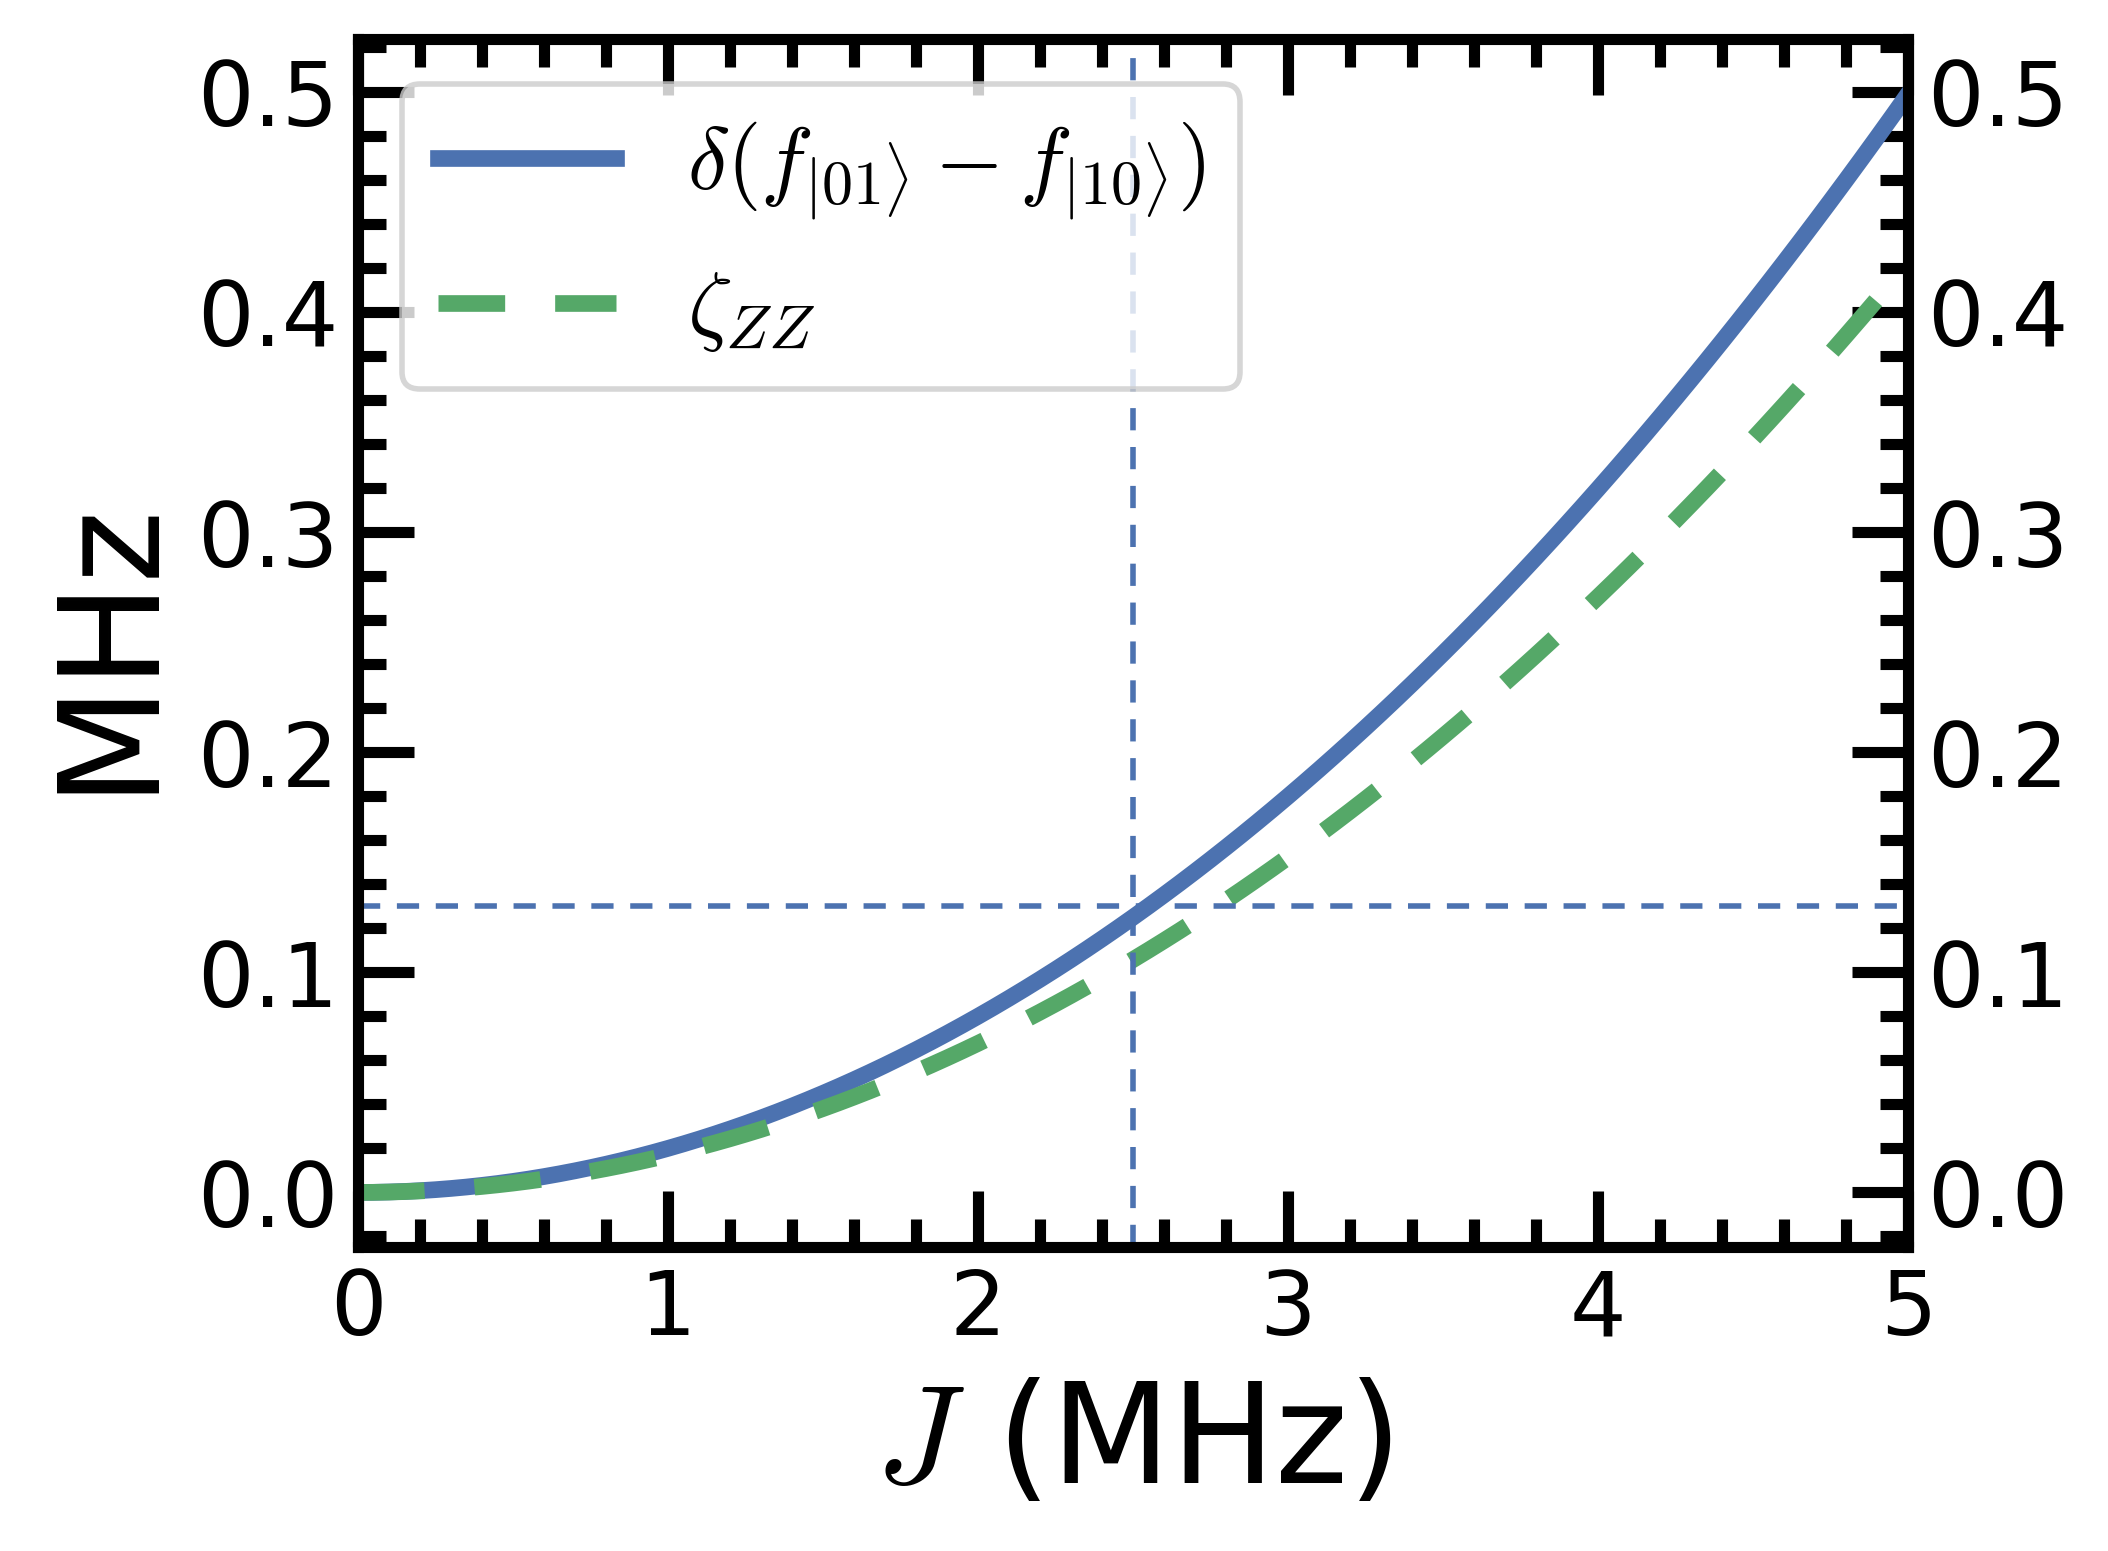

In [122]:
#Calculate ZZ rate:
plt.figure(figsize = [5,4])
zeta_ZZ = energies_coupled_swE[system.level_label('11'),:] - energies_coupled_swE[system.level_label('01'),:] \
- (energies_coupled_swE[system.level_label('10'), :] - energies_coupled_swE[system.level_label('00'), :])
freq_shift = energies_coupled_swE[system.level_label('01'), :] - energies_coupled_swE[system.level_label('10'), :]
freq_anchor = freq_shift[0]
freq_shift = freq_shift - freq_anchor
plt.plot(J_C_array*1e3, (freq_shift)*1e3, label = r'$\delta (f _{|01\rangle} - f_{|10\rangle})$')
plt.plot(J_C_array*1e3, (zeta_ZZ)*1e3, label = r'$\zeta_{ZZ}$', linewidth = 3.0, linestyle = '--')

plt.legend()
plt.tick_params(left=True, right=True,labelleft=True, labelright=True)
plt.ylabel('MHz')
plt.xlabel('$J$ (MHz)')
plt.axvline(x=2.5, linewidth = 1.0, linestyle = '--')
plt.axhline(y=0.13, linewidth = 1.0, linestyle = '--')
plt.xlim([J_C_array[0]*1e3, J_C_array[-1]*1e3])

Text(0.5, 0, '$J$ (MHz)')

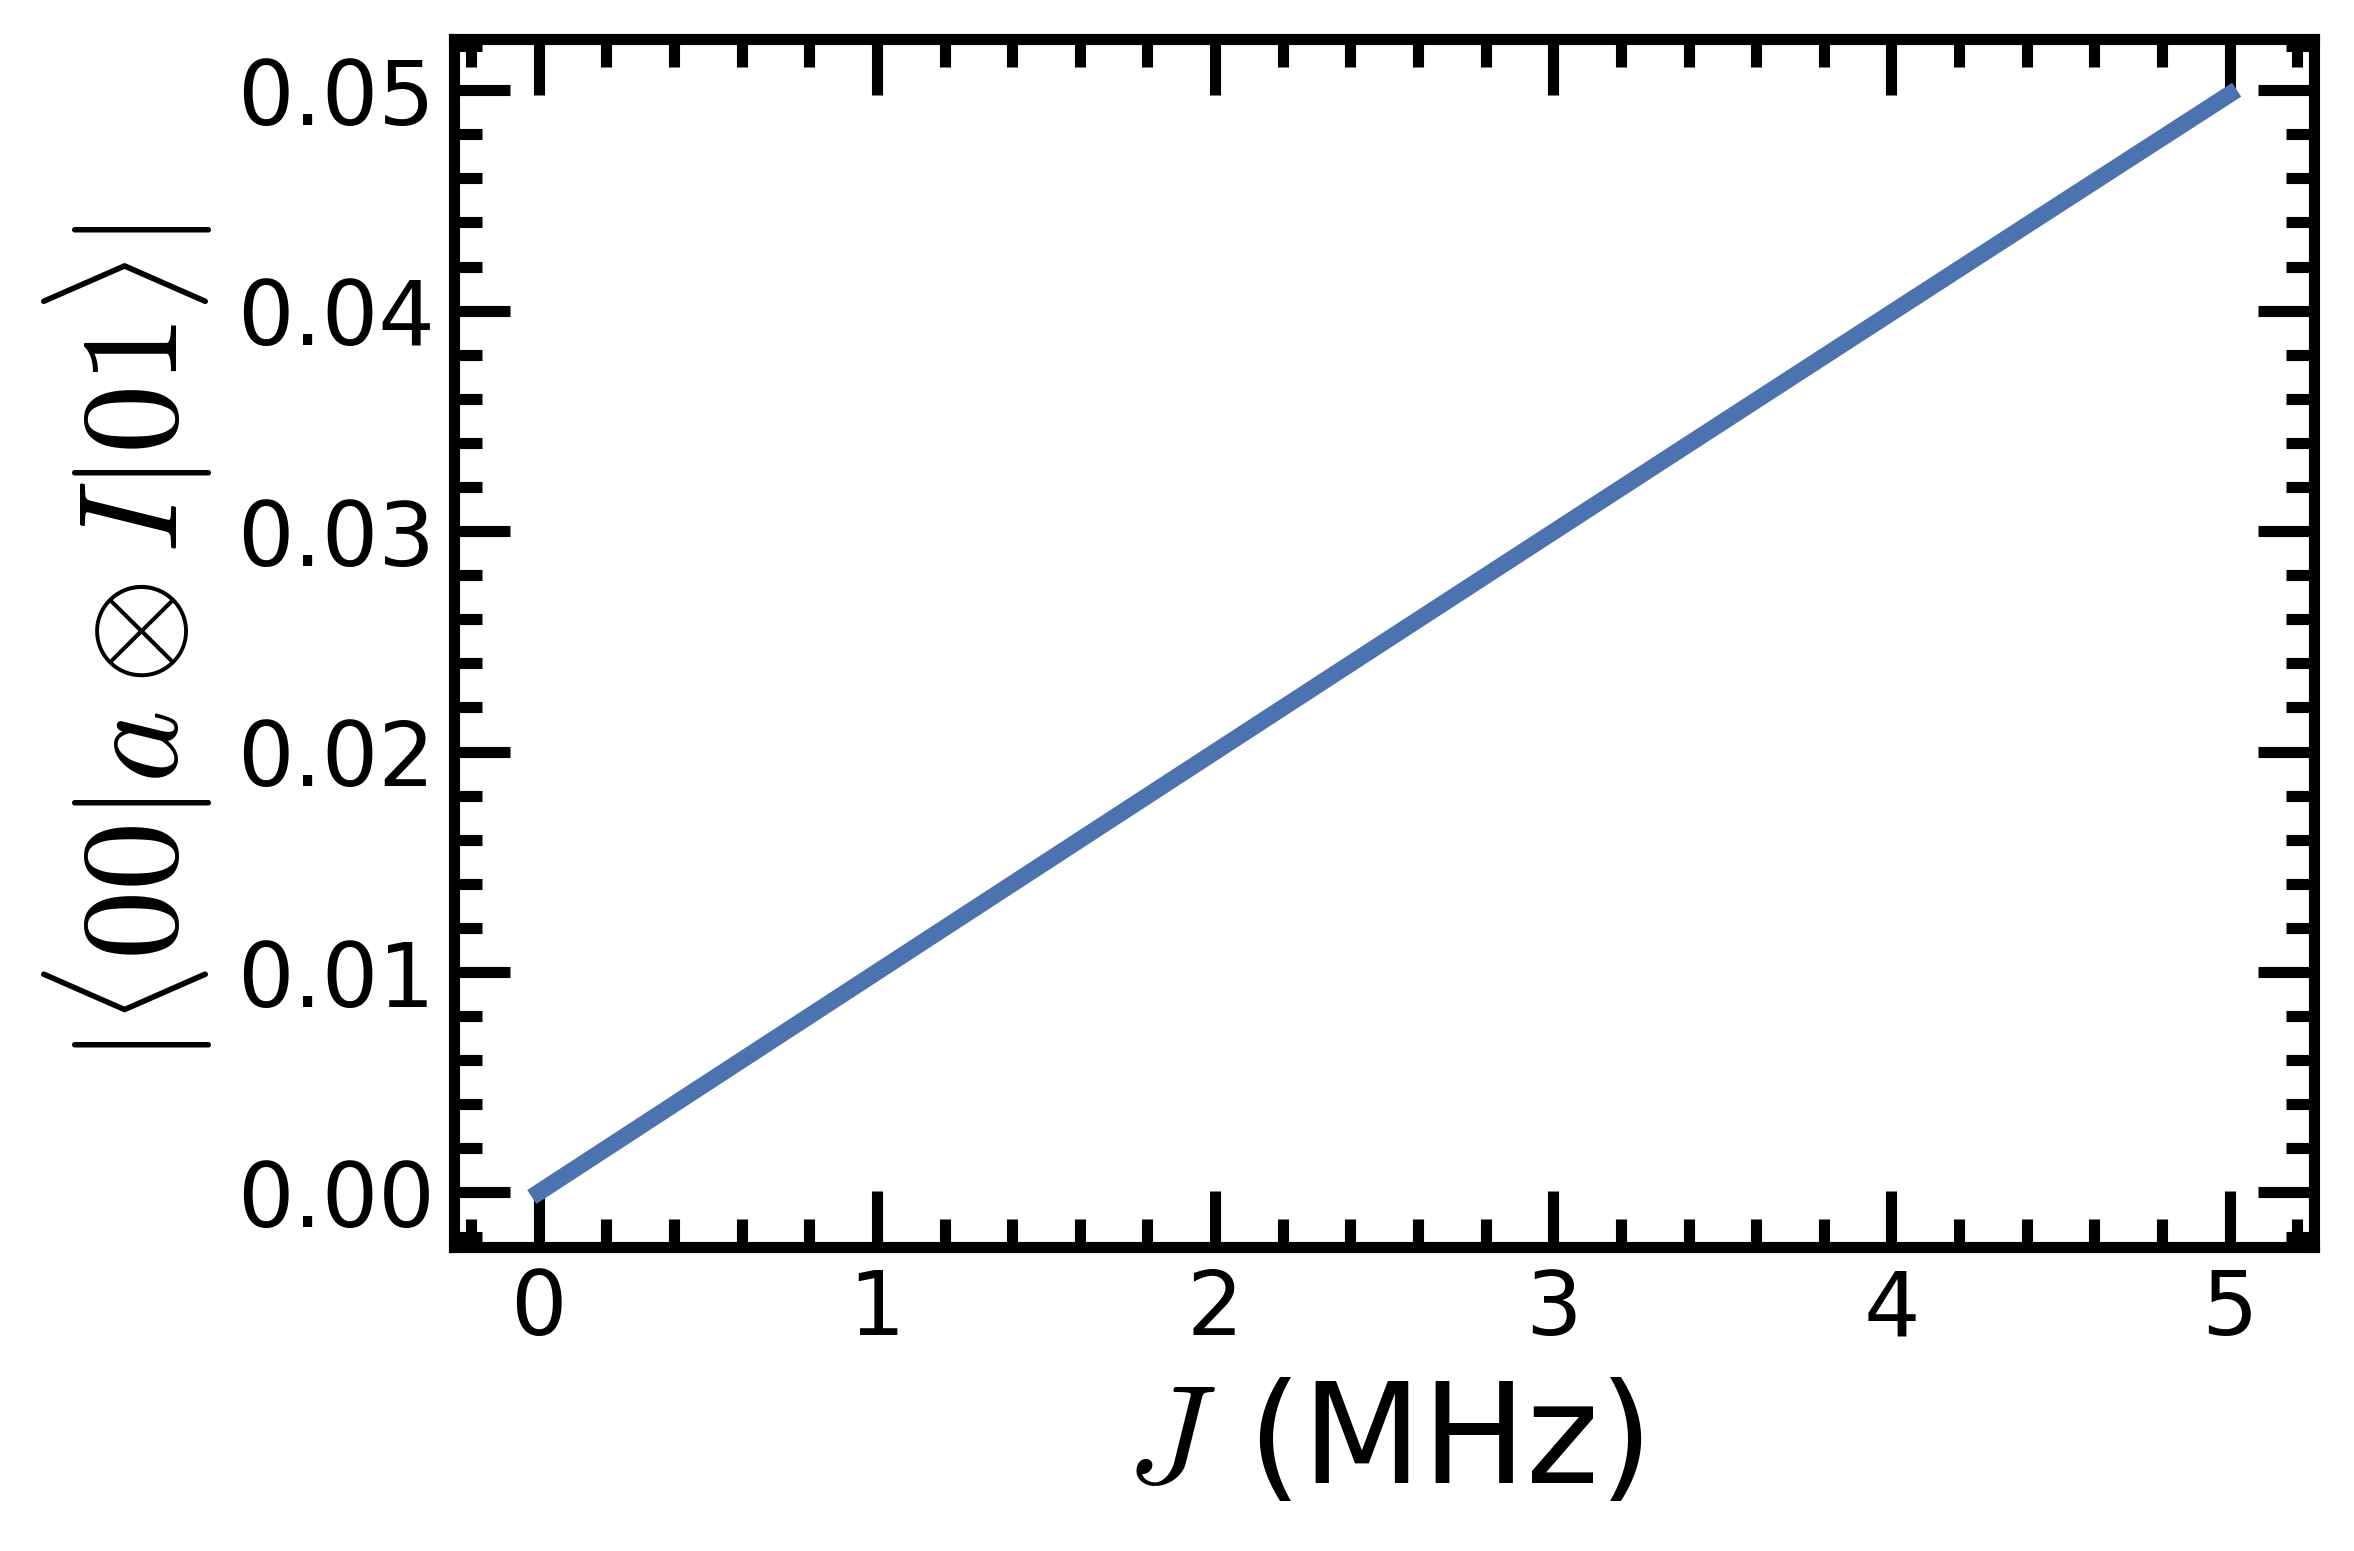

In [123]:
plt.plot(J_C_array*1e3, m_element)
plt.ylabel(r'$|\langle 00 |a \otimes I|01 \rangle | $')
plt.xlabel(r'$J$ (MHz)')

## Virtual coupling

In [127]:
g_array = np.linspace(0,0.1,51)
m_element = np.zeros_like(g_array )
zz_array = np.zeros_like(g_array )
freq_shift = np.zeros_like(g_array)
omega_c = 6 # Resonator freq
coupl_resonator= resonator.Cavity(omega=omega_c, nlev=5)
for idx, g in enumerate(g_array):
    system = coupobj.CoupledObjects(qubit1, qubit2, coupl_resonator,
                                   [qubit1, coupl_resonator, g, 'JC-rwa'],
                                   [qubit2, coupl_resonator, g, 'JC-rwa'],
                                   [qubit1, qubit2,0, 'JC-rwa'])
    zz_array[idx] = system.level('110') + system.level('000') - system.level('100') - system.level('010')
    freq_shift[idx] = system.level('010') - system.level('100')
    m_element[idx] = abs(system.a(0).matrix_element(system.eigvec('000'), system.eigvec('010')))

(0.0, 100.0)

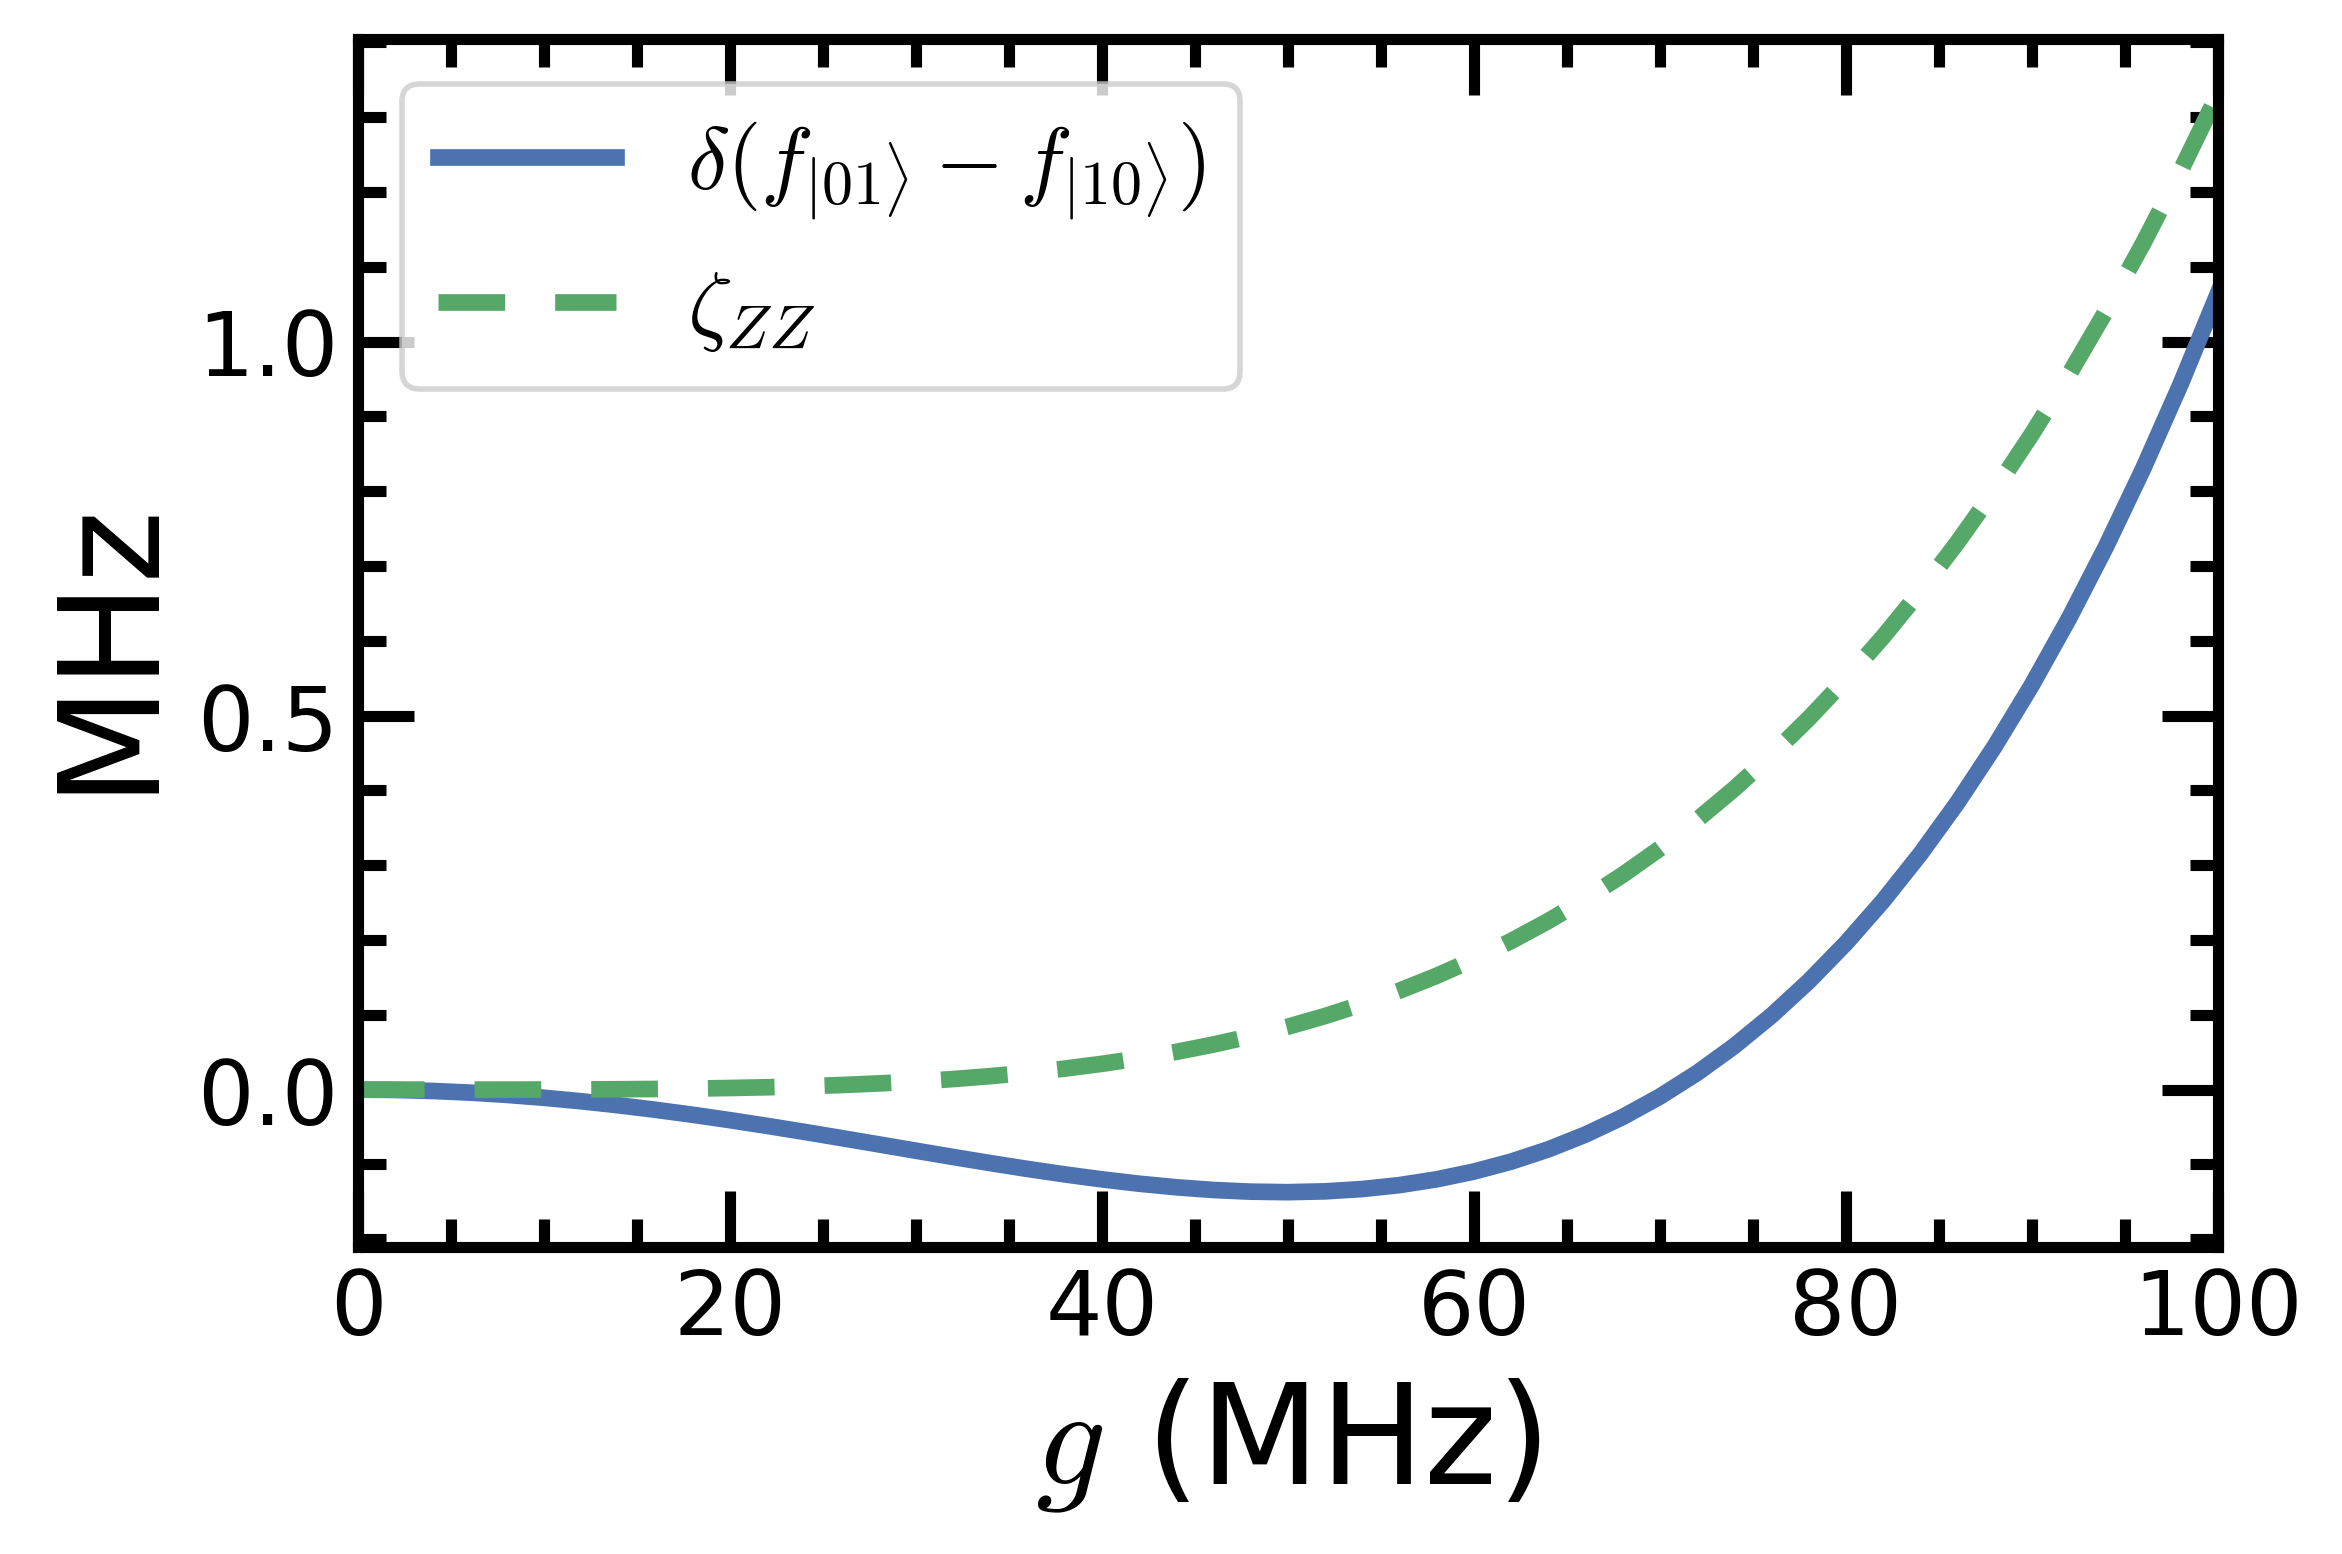

In [128]:
plt.plot(g_array*1e3, (freq_shift-freq_anchor)*1e3, label = r'$\delta (f _{|01\rangle} - f_{|10\rangle})$')
plt.plot(g_array*1e3, (zz_array)*1e3, label = r'$\zeta_{ZZ}$', linewidth = 3.0, linestyle = '--')
plt.legend()
plt.ylabel('MHz')
plt.xlabel('$g$ (MHz)')
# plt.axvline(x=2.5, linewidth = 1.0, linestyle = '--')
# plt.axhline(y=0.13, linewidth = 1.0, linestyle = '--')
plt.xlim([g_array[0]*1e3, g_array[-1]*1e3])

Text(0.5, 0, '$g$ (MHz)')

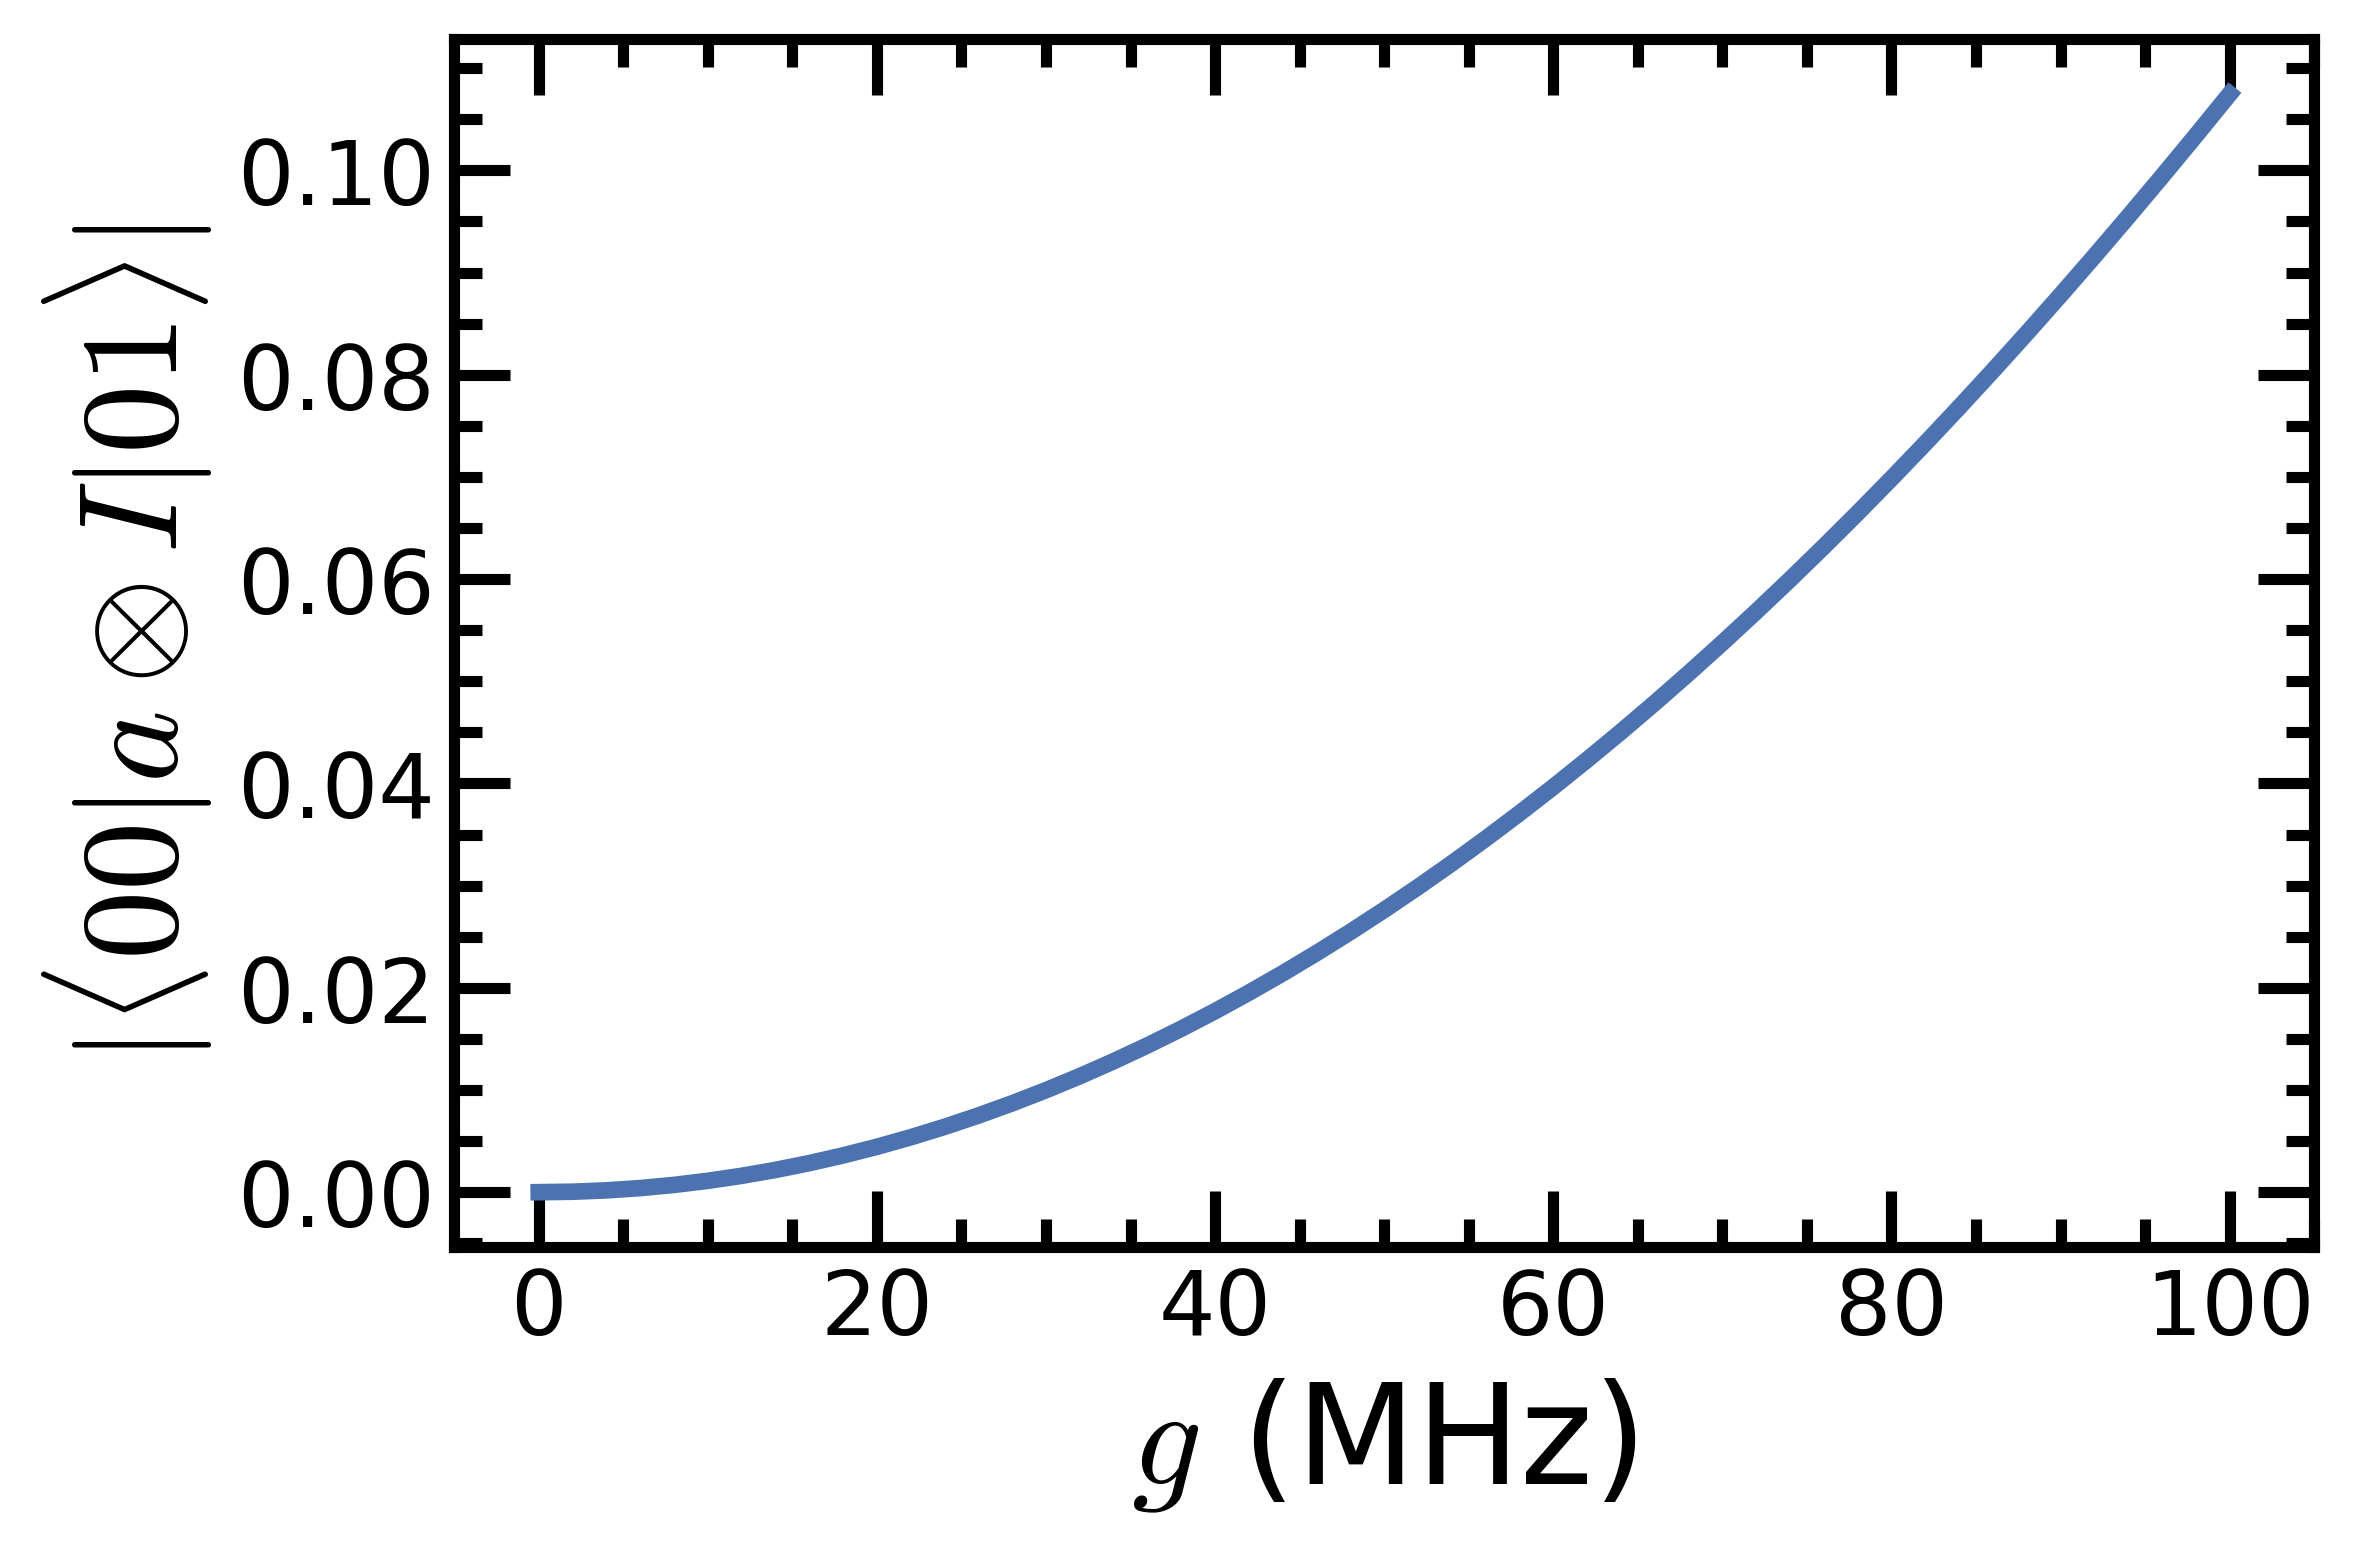

In [129]:
plt.plot(g_array*1e3, m_element)
plt.ylabel(r'$|\langle 00 |a \otimes I|01 \rangle | $')
plt.xlabel(r'$g$ (MHz)')

## Multi-path

In [130]:
J_C_array = np.linspace(0,0.01,51)
g = 0.08
m_element = np.zeros_like(g_array )
zz_array = np.zeros_like(g_array )
freq_shift = np.zeros_like(g_array)
omega_c = 7.2 # Resonator freq
coupl_resonator= resonator.Cavity(omega=omega_c, nlev=5)
for idx, J_C in enumerate(J_C_array):
    system = coupobj.CoupledObjects(qubit1, qubit2, coupl_resonator,
                                   [qubit1, coupl_resonator, g, 'JC-rwa'],
                                   [qubit2, coupl_resonator, g, 'JC-rwa'],
                                   [qubit1, qubit2, J_C, 'JC-rwa'])
    zz_array[idx] = system.level('110') + system.level('000') - system.level('100') - system.level('010')
    freq_shift[idx] = system.level('010') - system.level('100')
    m_element[idx] = abs(system.a(0).matrix_element(system.eigvec('000'), system.eigvec('010')))

Text(0.5, 0, '$J_C$ (MHz)')

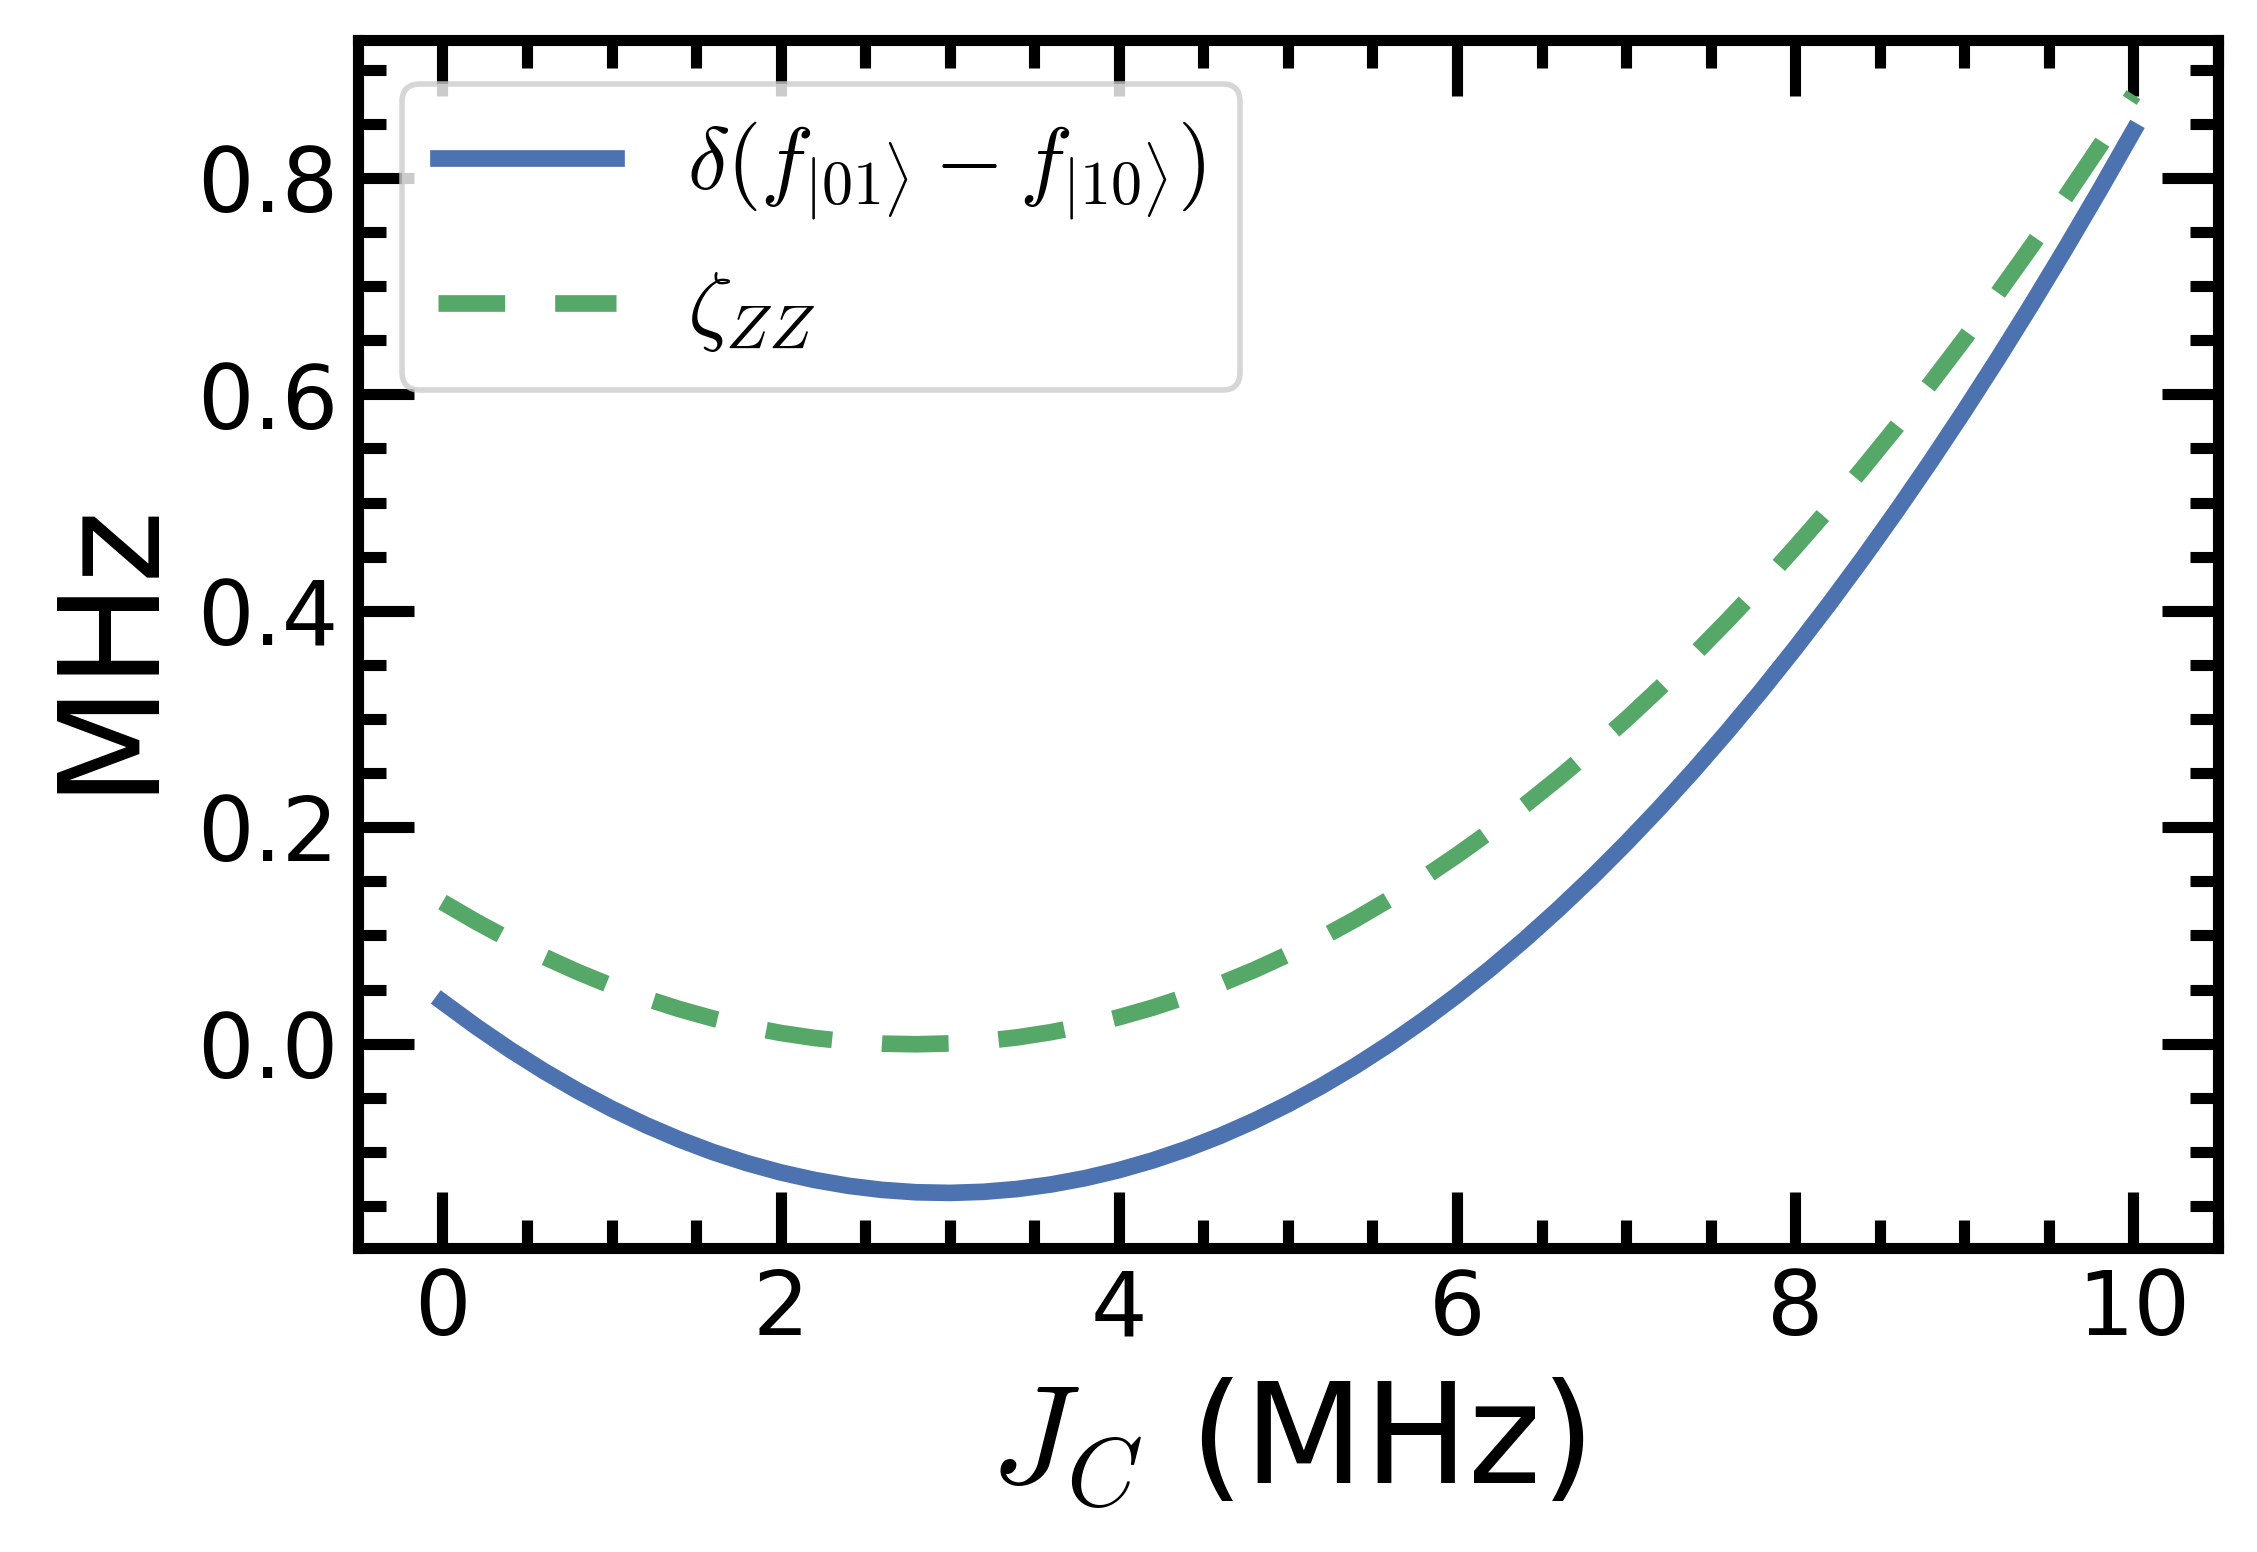

In [131]:
plt.plot(J_C_array*1e3, (freq_shift-freq_anchor)*1e3, label = r'$\delta (f _{|01\rangle} - f_{|10\rangle})$')
plt.plot(J_C_array*1e3, (zz_array)*1e3, label = r'$\zeta_{ZZ}$', linewidth = 3.0, linestyle = '--')
plt.legend()
plt.ylabel('MHz')
plt.xlabel('$J_C$ (MHz)')

Text(0.5, 0, '$J_C$ (MHz)')

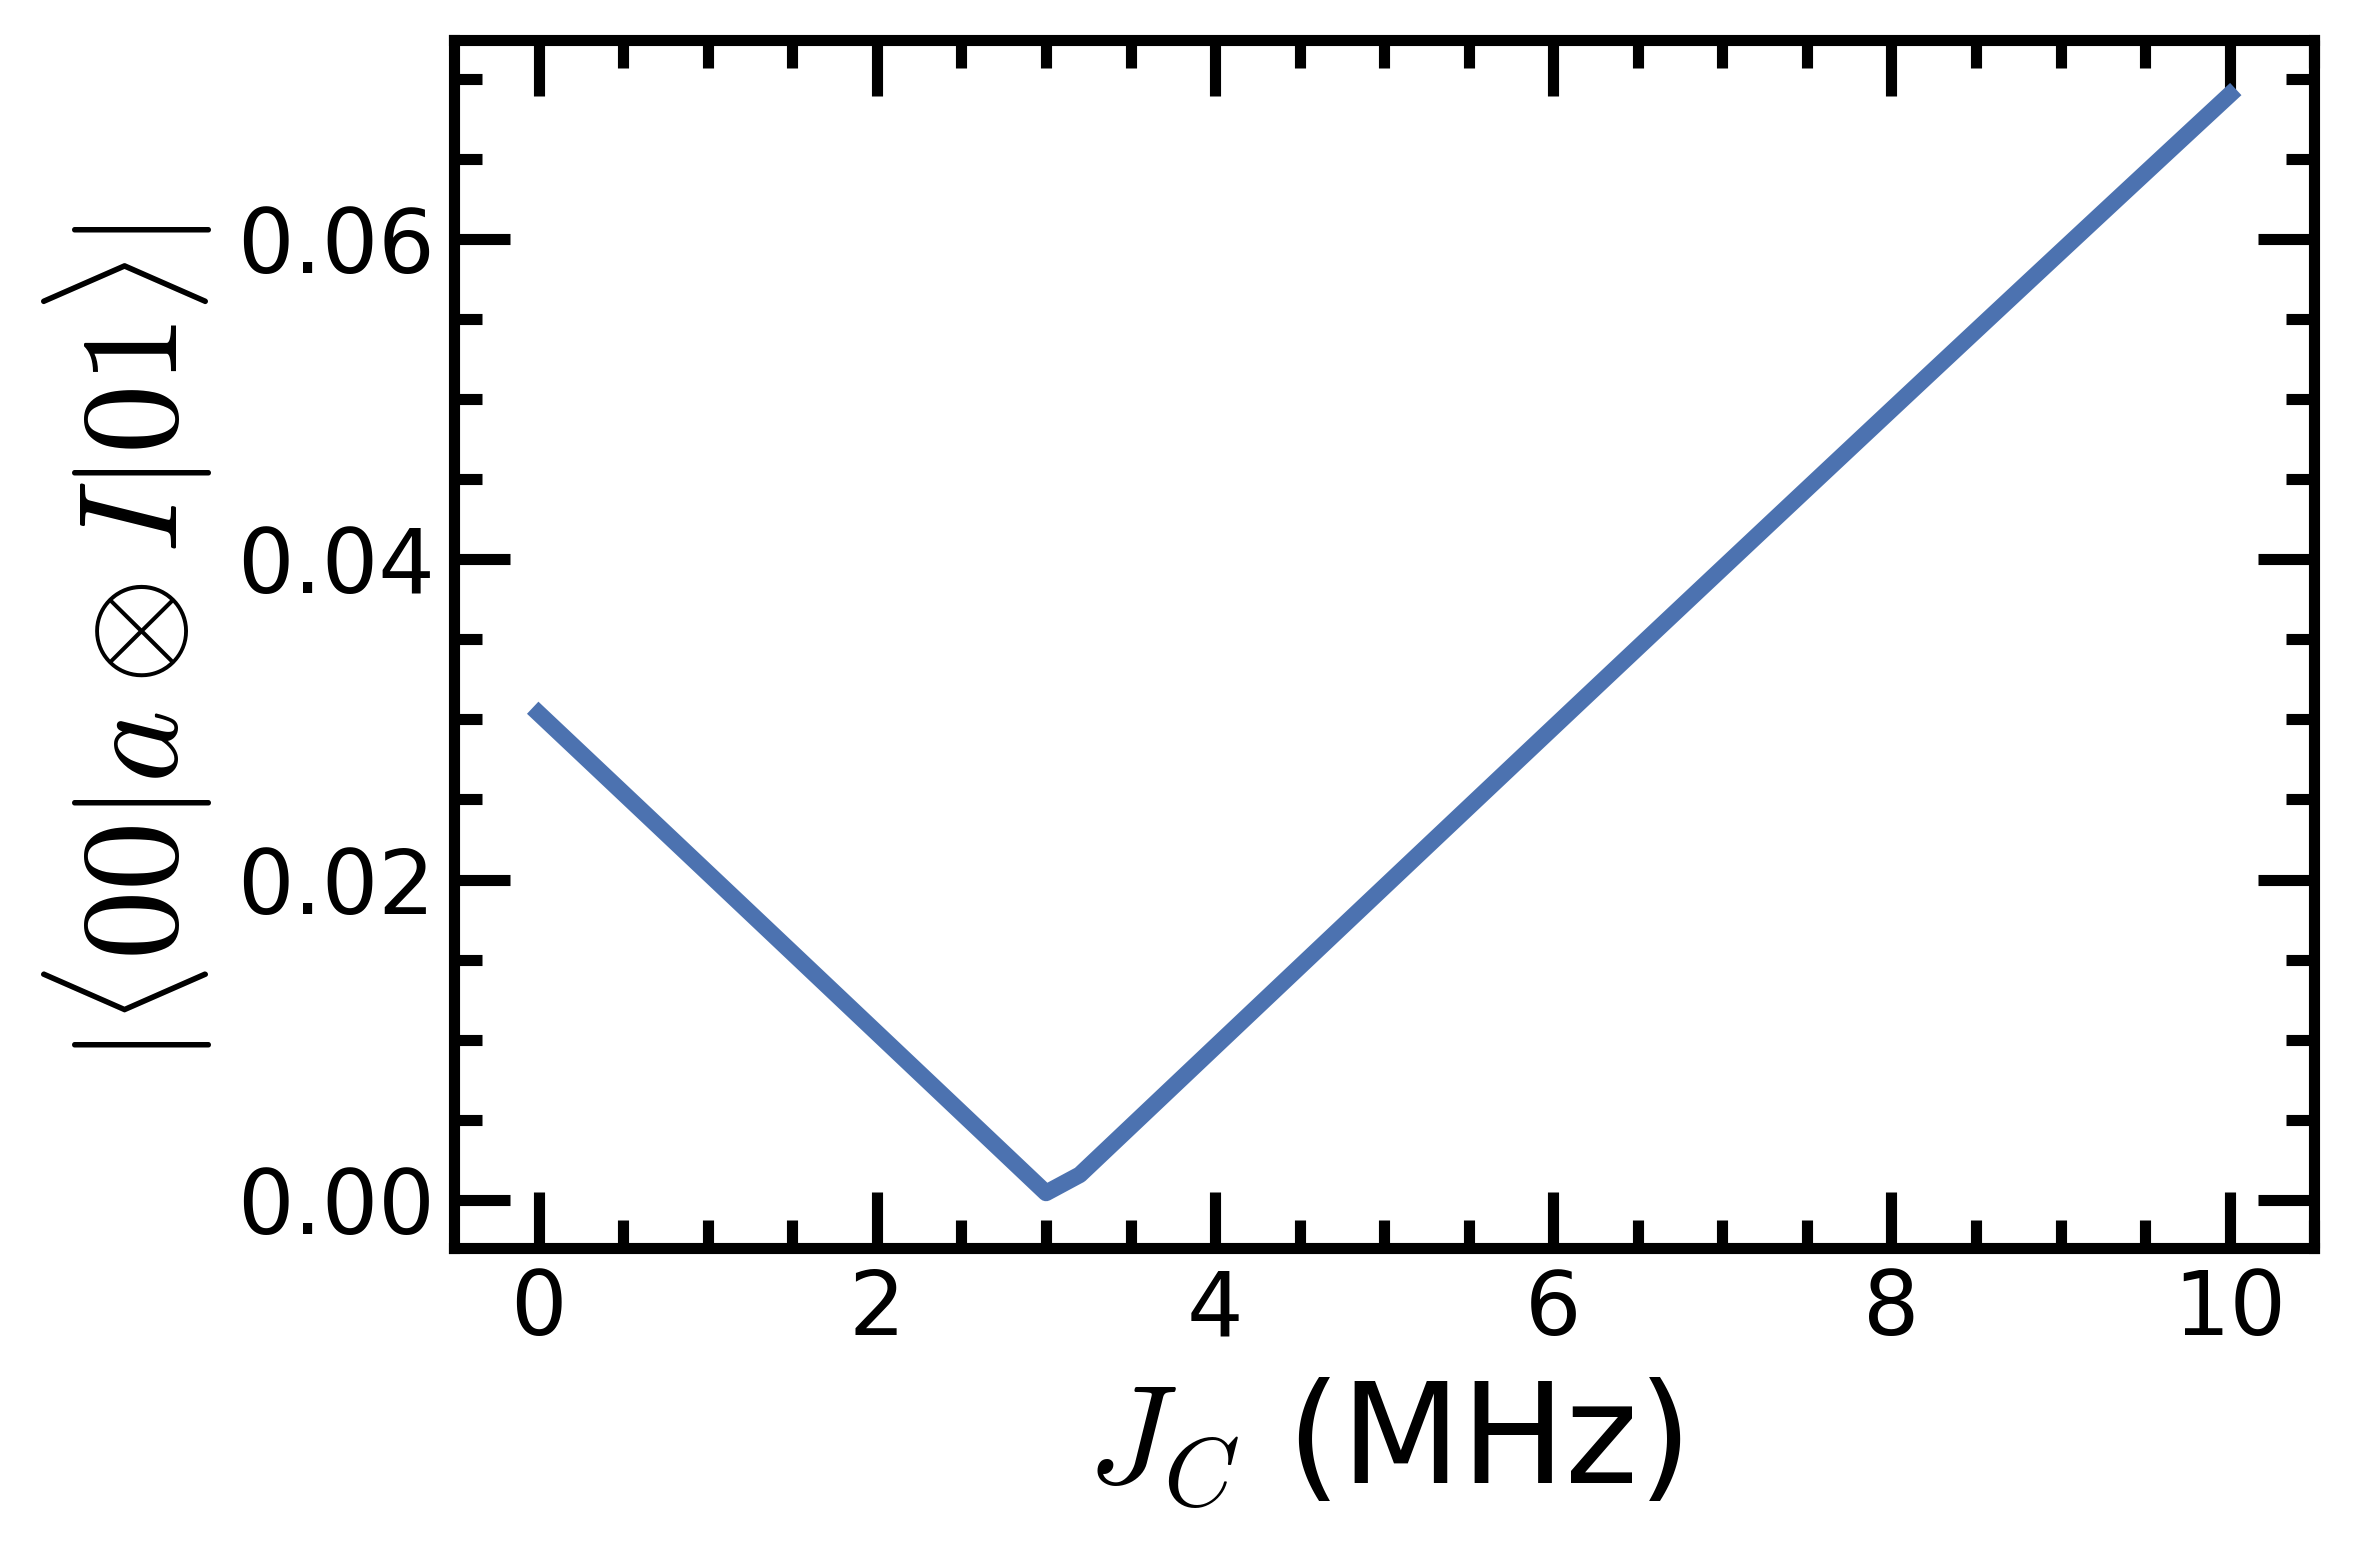

In [132]:
plt.plot(J_C_array*1e3, m_element)
plt.ylabel(r'$|\langle 00 |a \otimes I|01 \rangle | $')
plt.xlabel(r'$J_C$ (MHz)')

In [133]:
w_c_array = np.linspace(4,12,41)
g = 0.06
J_C = 0.006
m_element = np.zeros_like(w_c_array)
zz_array = np.zeros_like(w_c_array)
freq_shift = np.zeros_like(w_c_array)

for idx, w_c in enumerate(w_c_array):
    coupl_resonator= resonator.Cavity(omega=w_c, nlev=5)
    system = coupobj.CoupledObjects(qubit1, qubit2, coupl_resonator,
                                   [qubit1, coupl_resonator, g, 'JC-rwa'],
                                   [qubit2, coupl_resonator, g, 'JC-rwa'],
                                   [qubit1, qubit2, J_C, 'JC-rwa'])
    zz_array[idx] = system.level('110') + system.level('000') - system.level('100') - system.level('010')
    freq_shift[idx] = system.level('010') - system.level('100')
    m_element[idx] = abs(system.a(0).matrix_element(system.eigvec('000'), system.eigvec('010')))

Text(0.5, 0, 'r$\\omega_r$ (GHz)')

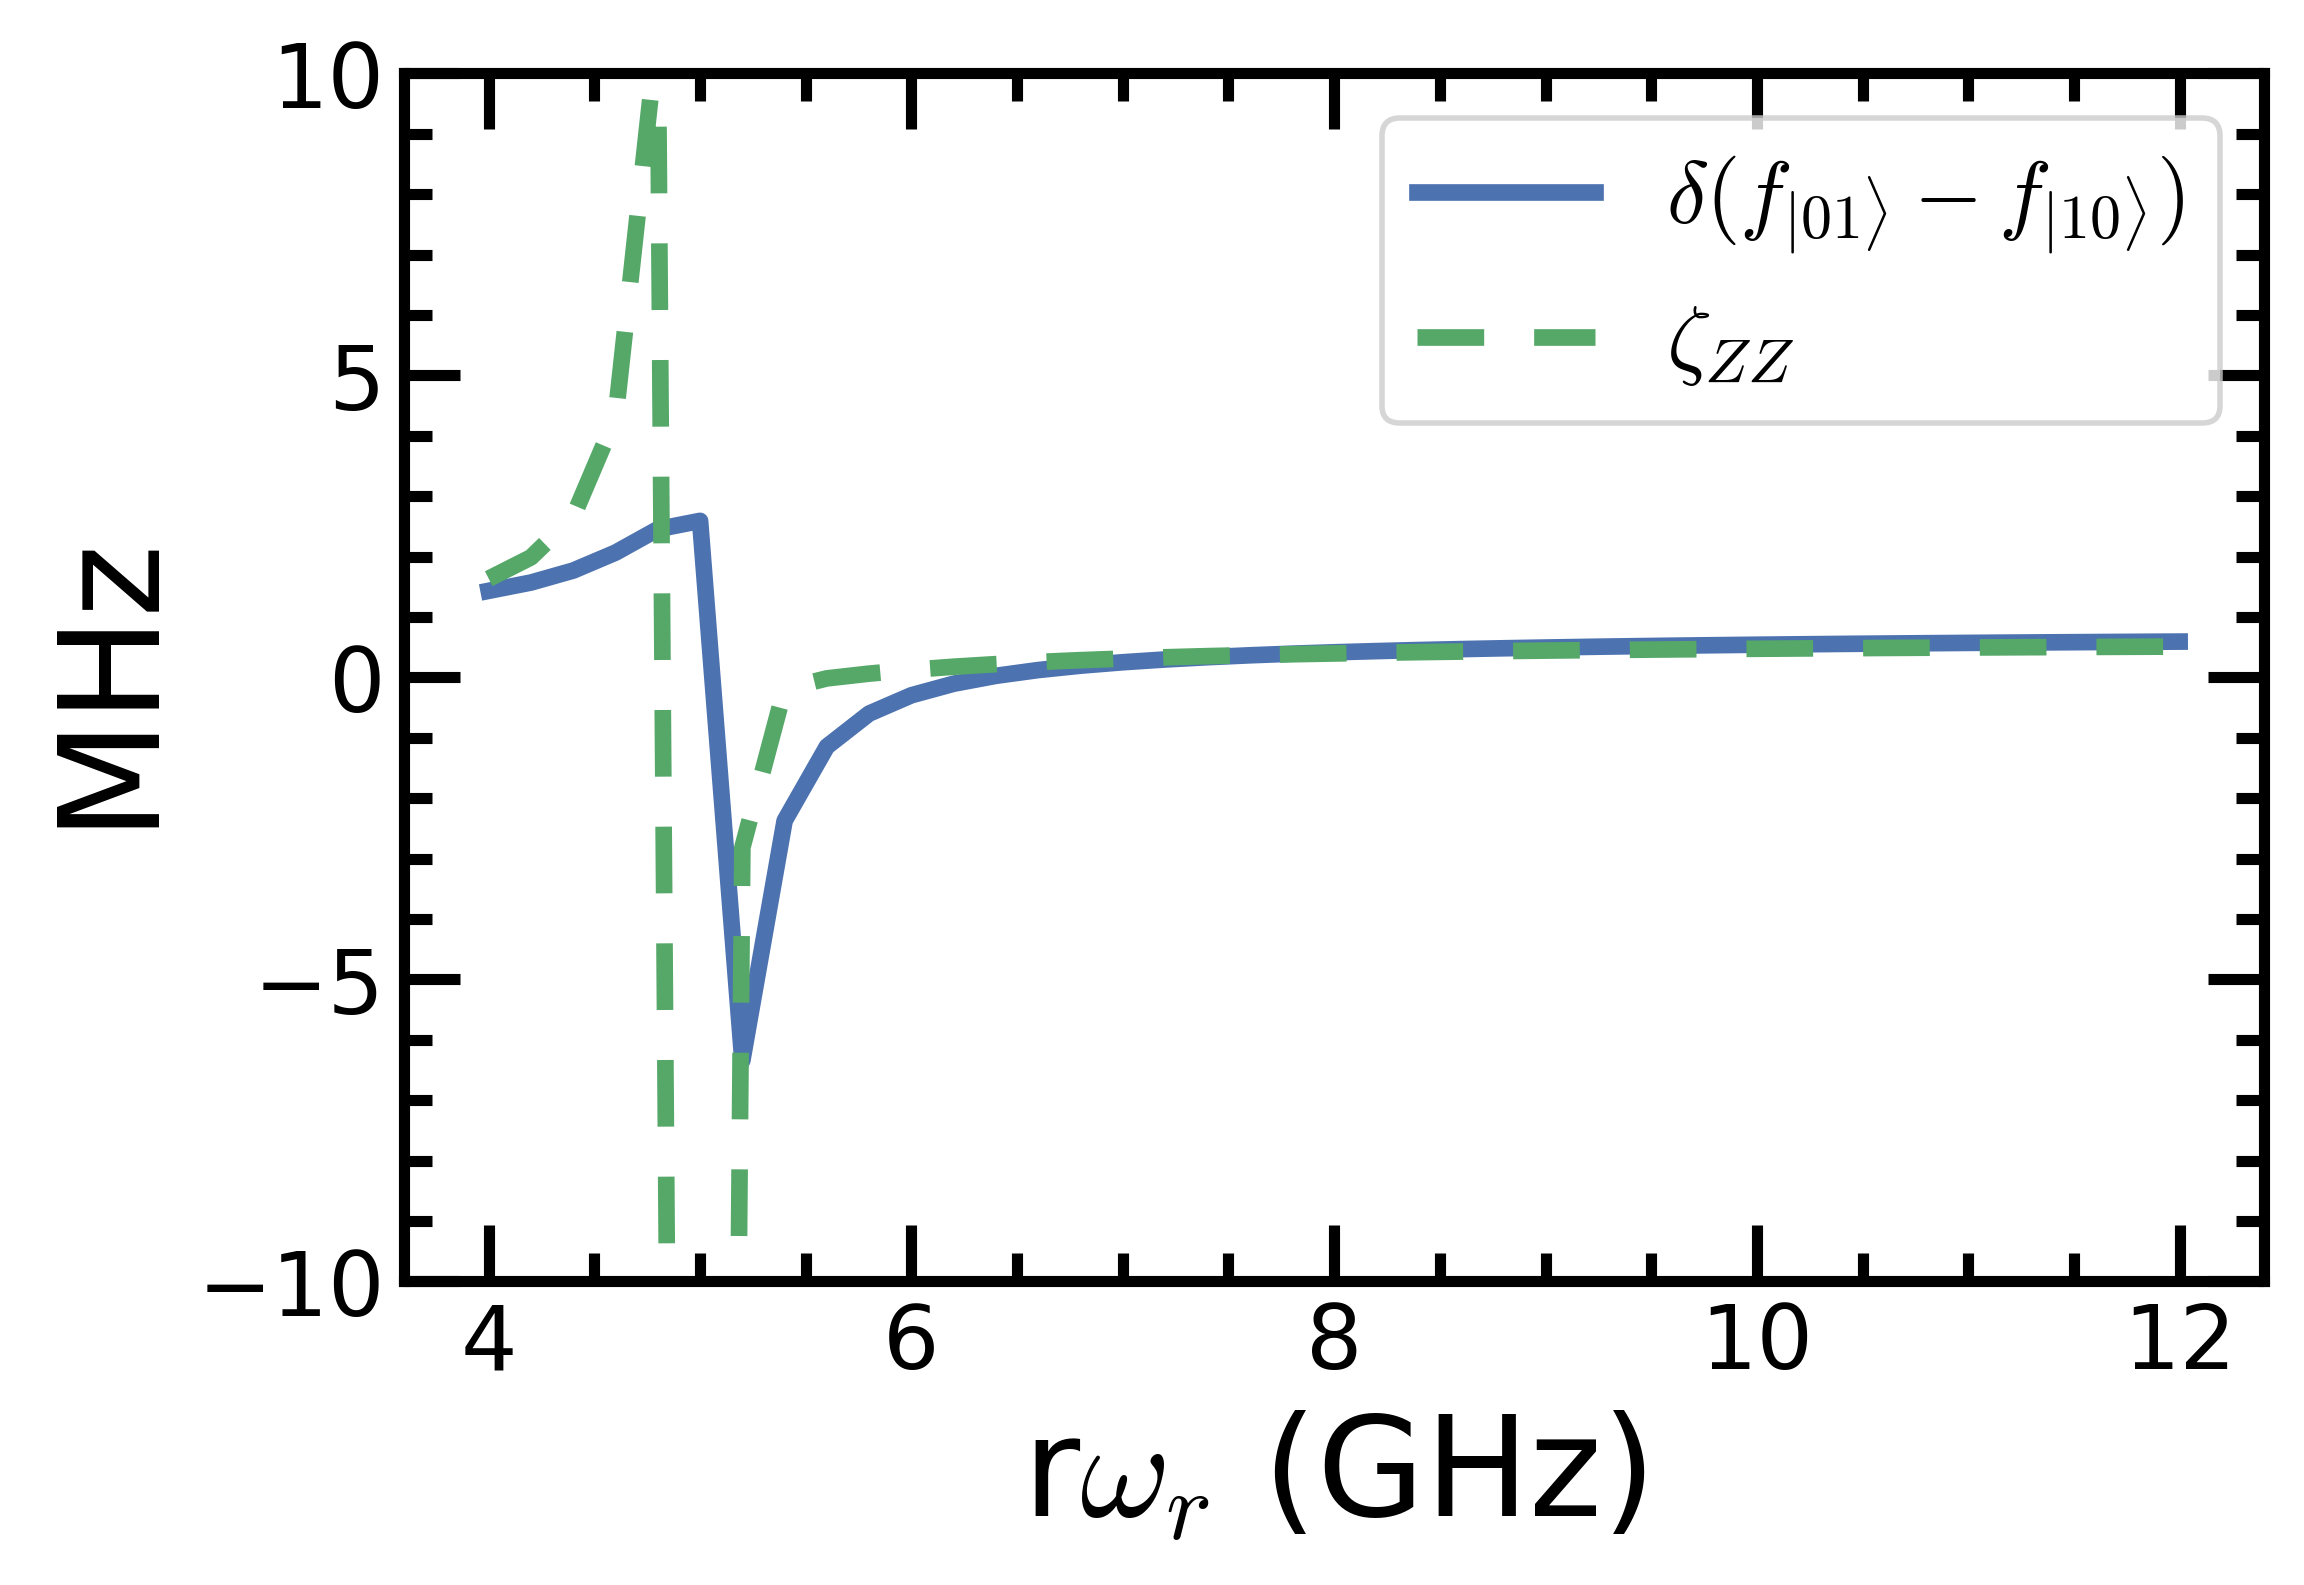

In [134]:
plt.plot(w_c_array, (freq_shift-freq_anchor)*1e3, label = r'$\delta (f _{|01\rangle} - f_{|10\rangle})$')
plt.plot(w_c_array, (zz_array)*1e3, label = r'$\zeta_{ZZ}$', linewidth = 3.0, linestyle = '--')
plt.legend()
plt.ylim([-10,10])
plt.ylabel('MHz')
plt.xlabel('r$\omega_r$ (GHz)')

Text(0.5, 0, '$\\omega_r$ (GHz)')

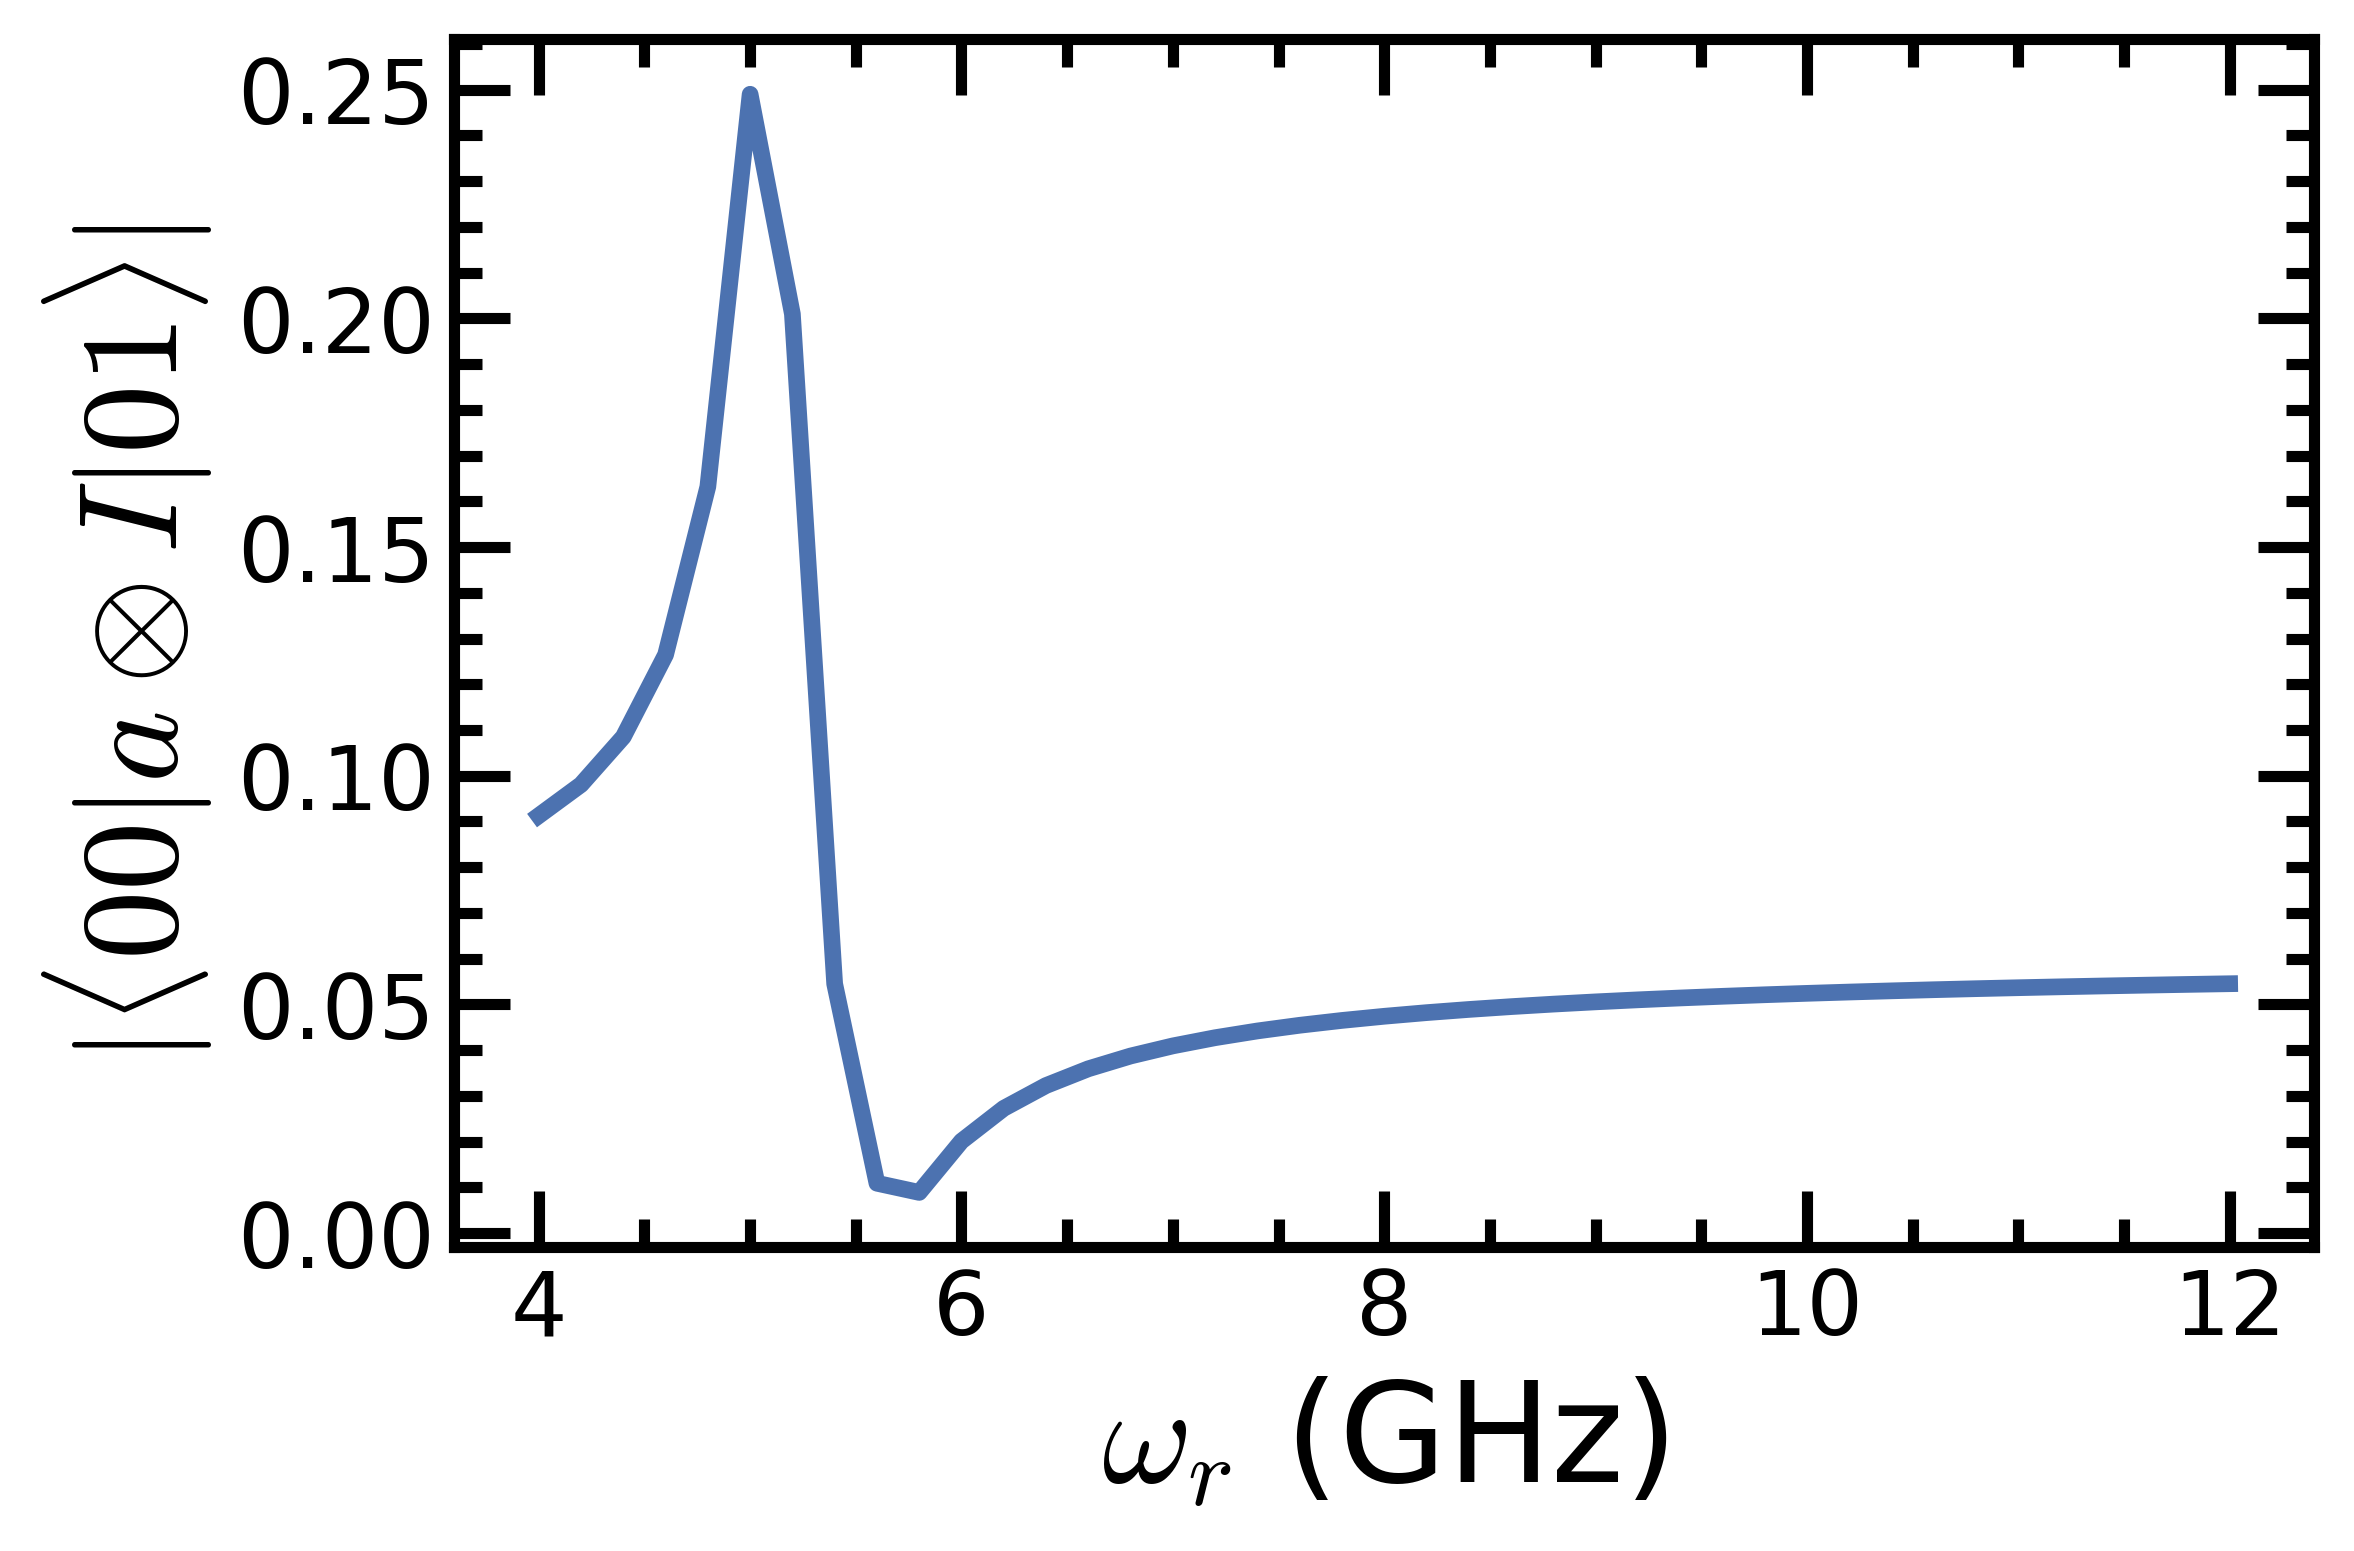

In [135]:
plt.plot(w_c_array, m_element)
plt.ylabel(r'$|\langle 00 |a \otimes I|01 \rangle | $')
plt.xlabel(r'$\omega_r$ (GHz)')

# SQUID
## Parameters

In [7]:
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import qchard_squid as squid
import numpy as np
E_C = 0.2
E_Jsum = 22
d = 0.05
phi_ext = 0.0
nlev = 7
nlev_charge = 40
coupler = squid.Squid(E_C = E_C, E_Jsum = E_Jsum, d = d, phi_ext = phi_ext, nlev = nlev, nlev_charge = nlev_charge)

In [8]:
print(coupler.levels())

[-39.85538303 -31.67000664 -23.6966901  -15.94478668  -8.42516312
  -1.15065303   5.86327342]


In [9]:
print(coupler.n_ij(0,1))

(1.5992851171667595+0j)


In [10]:
phi_ext_array = np.linspace(0,1,101)*np.pi*2
energies = np.zeros((len(phi_ext_array), nlev))
for idx, phi_ext in enumerate (phi_ext_array):
    coupler = squid.Squid(E_C = E_C, E_Jsum = E_Jsum, d = d, phi_ext = phi_ext, nlev = nlev, nlev_charge = nlev_charge)
    energies[idx, :] = coupler.levels()

(0.0, 10.0)

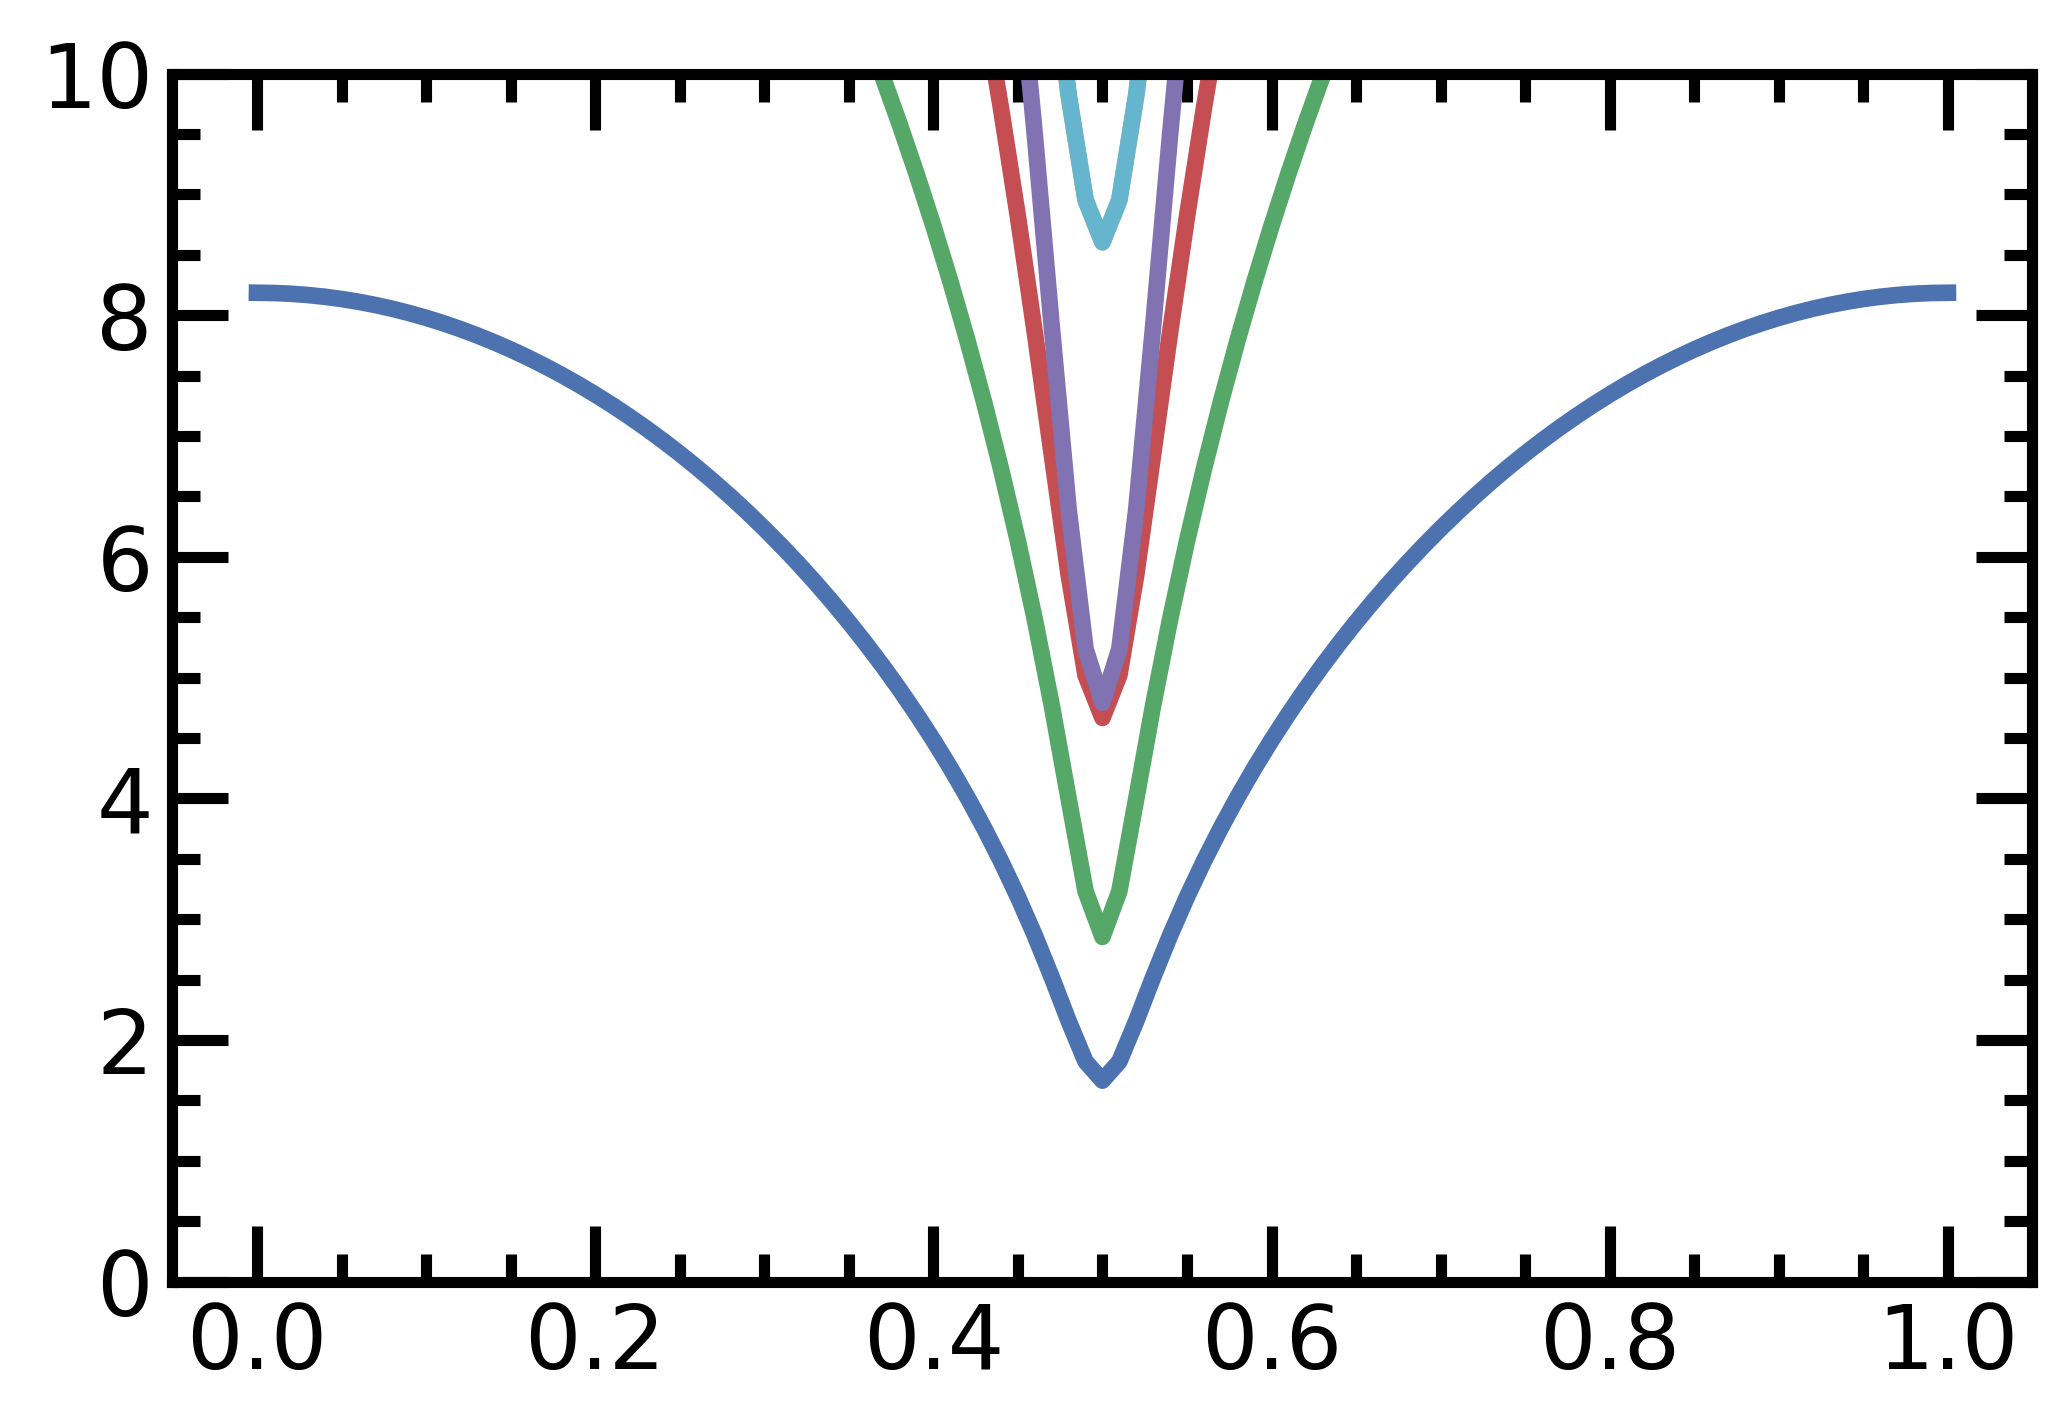

In [11]:
for idx in range (1, nlev):
    plt.plot(phi_ext_array/np.pi/2, energies[:,idx] - energies[:,0])
plt.ylim([0,10])